In [1]:
from data.data import Unitig, Sequence, Kmer
import pickle
import os
import json
from graph.graph import add_to_dict, get_kmer_count_from_sequences, get_gt_graph, get_unitigs_bcalm, Graph, switch_index
from data.inout import load_sequences,create_gfa_csv
from common.utils import numseq2bytes, seq2num, compute_unitig_ref
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from edist.sed import  sed
from dtaidistance import dtw

In [2]:
ref_file = "../input/truth_data/GCA_027944875.1_ASM2794487v1_genomic.truth_genes.json"
with open(ref_file, 'r') as f:
    ref_data = json.load(f)
read_file = "../input/real_data/SRR23044204_1.subset.pandora_gene_calls.json"
with open(read_file, 'r') as f:
    read_data = json.load(f)

blocks2reads = {}
for k,g in read_data.items():
    for block in g:
        add_to_dict(blocks2reads,block[1:],k)
for k,g in ref_data.items():
    for block in g:
        add_to_dict(blocks2reads,block[1:],k)
blocks = list(blocks2reads.keys())
blocks.sort()

alphabet = [("+"+p1,"-"+p1) for p1 in blocks]
bi_alphabet = (alphabet,{k:((i+1)*((-1)**j)) for i, ks in enumerate(alphabet) for j, k in enumerate(ks)})
l_alphabet = len(alphabet)
if l_alphabet < 2**7:
    Sequence.n_b = 1
elif l_alphabet < 2**15:
    Sequence.n_b = 2
elif l_alphabet < 2**31:
    Sequence.n_b = 4
else:
    Sequence.n_b = 8
Sequence.bi_alphabet = bi_alphabet

ref_seqs = [Sequence(i,numseq2bytes(seq2num(seq,Sequence.bi_alphabet),Sequence.n_b),1) for i,seq in enumerate(ref_data.values())]
read_data_trimmed = read_data.values()
read_seqs = [Sequence(i, numseq2bytes(seq2num(seq,Sequence.bi_alphabet), Sequence.n_b), 1) for i,seq in enumerate(read_data_trimmed)]


In [10]:
s1.dtype

dtype('float64')

In [8]:
s1 = np.array([0.0, 0, 1, 2, 1, 0, 1, 0, 0])
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0])
d = dtw.distance_fast(s1, s2)

In [13]:
l = [dtw.distance_fast(ref_seqs[0].num().astype(np.float64),r.num().astype(np.float64)) for r in read_seqs]

In [23]:
(np.array(l)<160000).sum()

13945

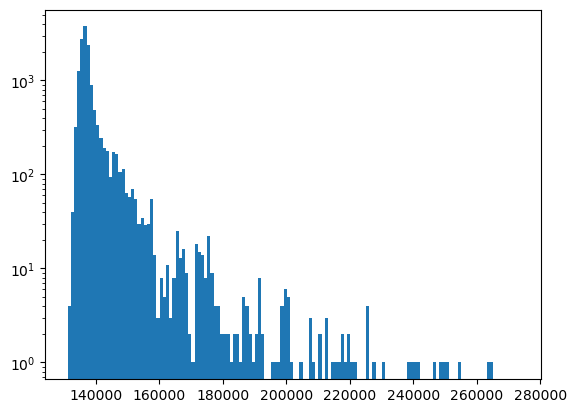

In [20]:
plt.hist(l,bins = range(int(min(l)), int(max(l)),1000))
plt.yscale("log")

In [5]:
read_seqs[0].num()

array([  542,   543,   544,   546,   547, -3614,  -222,   223,  1304,
        1305,   224,   221,  1602,   462,  3613], dtype=int16)

In [25]:
from Bio import Align

In [44]:
aligner = Align.PairwiseAligner()
aligner = Align.PairwiseAligner()
aligner.match_score = 5
aligner.mismatch_score = -9
aligner.mode = 'global'
aligner.target_internal_open_gap_score = -12
aligner.target_internal_extend_gap_score = -3
aligner.target_end_open_gap_score = -12
aligner.target_end_extend_gap_score = -3
aligner.query_internal_open_gap_score = -12
aligner.query_internal_extend_gap_score = -3

# Set the query_end penalties to zero to effectively implement a 'glocal' alignment as described in the question
# These are the default values, so you could skip the next two lines, 
#    but this is relevant to the question, so I'm including them in the example.
aligner.query_end_open_gap_score = 0
aligner.query_end_extend_gap_score = 0

In [46]:
alignments = aligner.align([0,1,2], [0,1,2])

for a in alignments:
    print(a)
print()
print()

TypeError: sequence has unexpected type list

In [43]:
alignments.score

30.0